In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster

df1 = pd.read_csv("benchmark_vectors.csv", header=None, index_col=0)
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,
BenchmarkTest01193,0.239783,0.029274,0.985156,0.182951,0.164773,-1.273723,-0.607593,-0.648238,-0.778670,-0.156378,...,-0.138181,0.168693,-0.827260,0.548926,1.554109,-0.732515,0.591260,0.635817,0.050060,-1.192211
BenchmarkTest01304,0.081603,0.082010,0.718629,0.092195,0.373565,-1.288810,-0.598067,-0.673580,-0.794393,-0.154669,...,-0.062706,0.126828,-0.914847,0.442194,1.755898,-0.745973,0.674832,0.445062,-0.037662,-1.201660
BenchmarkTest00711,0.040579,0.018071,0.917949,0.163137,0.223456,-1.266168,-0.571813,-0.582055,-0.753160,-0.224280,...,-0.068698,0.154564,-0.801013,0.375190,1.555841,-0.752634,0.525393,0.496490,-0.042977,-1.157247
BenchmarkTest01515,0.091307,0.030493,0.882424,0.234340,0.427465,-1.182274,-0.387387,-0.616184,-0.743611,-0.181785,...,-0.012761,0.134582,-0.829598,0.313342,1.789121,-0.720814,0.615563,0.534791,-0.033441,-1.189481
BenchmarkTest01417,0.184775,0.097138,0.994879,0.252617,0.124158,-1.355794,-0.574915,-0.676444,-0.742966,-0.199506,...,-0.116791,0.164814,-0.913316,0.469839,1.593683,-0.749556,0.474318,0.571205,-0.048450,-1.203661


In [2]:
df2 = pd.read_csv("scorecard.csv", index_col=0)
df2.head()

,category,CWE,vulnerability,identified,pass/fail
name,,,,,
BenchmarkTest00001,pathtraver,22,true,true,pass
BenchmarkTest00002,pathtraver,22,true,false,fail
BenchmarkTest00003,hash,328,true,false,fail
BenchmarkTest00004,trustbound,501,true,false,fail
BenchmarkTest00005,crypto,327,true,false,fail


In [3]:
df = df2.join(df1)
df

,category,CWE,vulnerability,identified,pass/fail,1,2,3,4,5,...,91,92,93,94,95,96,97,98,99,100
name,,,,,,,,,,,,,,,,,,,,,
BenchmarkTest00001,pathtraver,22,true,true,pass,0.235433,-0.120124,0.898373,0.020175,0.446673,...,-0.089074,0.098290,-0.913902,0.562754,1.747717,-0.720410,0.750564,0.516127,-0.051278,-1.247689
BenchmarkTest00002,pathtraver,22,true,false,fail,0.164164,-0.114276,0.894222,0.070442,0.451752,...,-0.071319,0.042619,-0.962704,0.511350,1.797116,-0.733447,0.804262,0.506926,-0.095240,-1.247762
BenchmarkTest00003,hash,328,true,false,fail,0.096460,-0.162292,0.909454,0.090513,0.467231,...,-0.047350,0.054321,-0.890697,0.385340,1.698658,-0.717848,0.607125,0.466926,-0.082279,-1.217961
BenchmarkTest00004,trustbound,501,true,false,fail,0.203723,-0.069779,0.709390,-0.004596,0.495191,...,-0.027049,0.120374,-0.857488,0.459802,1.633006,-0.707152,0.584042,0.542830,-0.008886,-1.172063
BenchmarkTest00005,crypto,327,true,false,fail,0.054447,-0.171124,0.974497,0.150103,0.494581,...,-0.037726,0.071648,-0.902559,0.371475,1.826984,-0.725862,0.602056,0.424407,-0.109398,-1.235247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BenchmarkTest02736,sqli,89,false,false,pass,0.121606,-0.055012,0.648322,0.066867,0.563047,...,-0.017088,0.074018,-0.974342,0.384322,1.885023,-0.733861,0.806974,0.512355,-0.110761,-1.223881
BenchmarkTest02737,sqli,89,false,false,pass,0.198192,-0.105740,0.629518,0.023393,0.460613,...,-0.047439,0.072303,-0.900748,0.508050,1.743816,-0.726782,0.744142,0.481969,-0.047578,-1.194170
BenchmarkTest02738,sqli,89,false,false,pass,0.049198,-0.031077,0.793183,0.134001,0.407365,...,-0.015074,0.081631,-0.928862,0.383931,1.761332,-0.753227,0.665158,0.431552,-0.079667,-1.202036


In [69]:
rslt_df = df[(df['vulnerability'].str.contains('true')) & (df['category'].str.contains('xss|cmdi|sqli'))] 
rslt_df

,category,CWE,vulnerability,identified,pass/fail,1,2,3,4,5,...,91,92,93,94,95,96,97,98,99,100
name,,,,,,,,,,,,,,,,,,,,,
BenchmarkTest00006,cmdi,78,true,false,fail,0.074070,0.044827,0.721235,0.064175,0.325875,...,-0.006484,0.074133,-0.945382,0.367724,1.632818,-0.742437,0.729657,0.464787,-0.086217,-1.215485
BenchmarkTest00007,cmdi,78,true,false,fail,0.229014,0.020085,0.700129,0.039175,0.405371,...,-0.077258,0.197383,-0.930174,0.371990,1.665202,-0.732908,0.718298,0.713867,-0.131036,-1.210922
BenchmarkTest00008,sqli,89,true,false,fail,0.194282,-0.017194,0.644747,0.017695,0.436753,...,-0.065817,0.088301,-0.988902,0.460748,1.744989,-0.733224,0.699666,0.531183,-0.082190,-1.215932
BenchmarkTest00013,xss,79,true,true,pass,0.149709,0.079701,0.695878,0.084146,0.291568,...,-0.056935,0.142898,-0.891568,0.506658,1.492280,-0.741334,0.553234,0.557344,0.025082,-1.172740
BenchmarkTest00014,xss,79,true,true,pass,0.140207,0.075988,0.727770,0.109069,0.258530,...,-0.047598,0.131803,-0.896160,0.495664,1.469303,-0.745429,0.544183,0.538796,0.018449,-1.173941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BenchmarkTest02651,sqli,89,true,true,pass,0.327784,-0.040636,0.738198,0.057436,0.218104,...,-0.074448,0.086128,-0.875315,0.683709,1.437206,-0.731580,0.571541,0.498701,0.094192,-1.160968
BenchmarkTest02653,sqli,89,true,true,pass,0.464370,-0.000439,0.645641,0.039162,0.175451,...,-0.120251,0.110056,-0.844551,0.729486,1.429995,-0.726427,0.509879,0.558937,0.099538,-1.143774
BenchmarkTest02654,sqli,89,true,true,pass,0.407619,-0.002925,0.699776,0.092414,0.232309,...,-0.071141,0.089652,-0.880733,0.608574,1.464020,-0.722482,0.583016,0.556289,0.026831,-1.159441


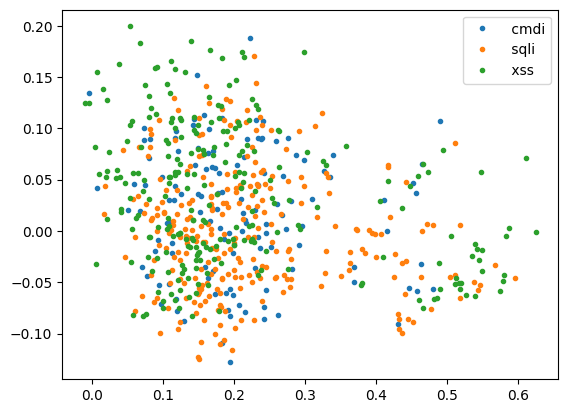

In [70]:
groups = rslt_df.groupby('category')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

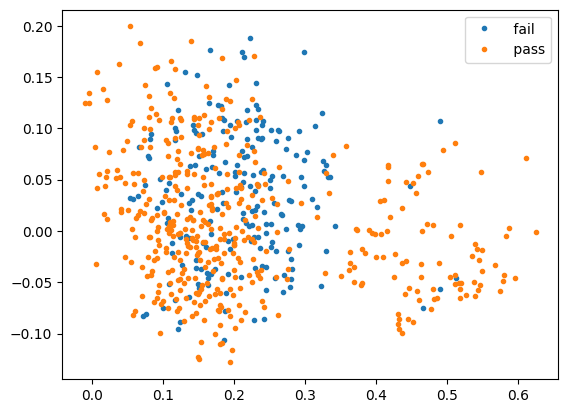

In [71]:
groups = rslt_df.groupby('pass/fail')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

In [72]:
X = rslt_df[list(range(1,101))]
y = rslt_df["pass/fail"]

k_means = cluster.KMeans(n_clusters=7)
k_means.fit(X)

print(k_means.labels_[::10])

/home/tbarber/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 6 0 6 3 0 2 2 6 1 0 2 1 2 3 6 1 6 3 5 4 0 0 2 4 6 0 6 1 4 2 3 3 3 2 0
 1 3 5 5 4 6 5 2 0 2 6 5 0 1 3 3 1 1 3 6 6 1 6 0 5 5 4 4]


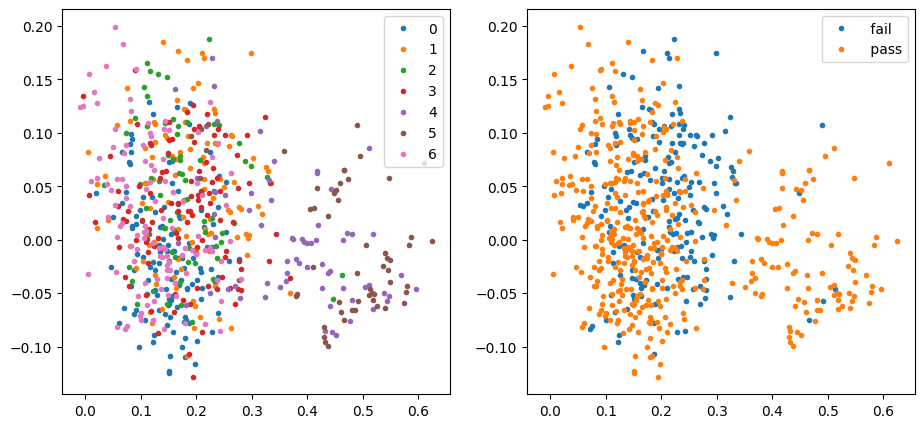

In [73]:
rslt_df_kmeans = rslt_df.copy()

rslt_df_kmeans["kmean"] = k_means.labels_
rslt_df_kmeans["pass/fail"] = y

fig = plt.figure(figsize=(11, 5))

# Kmeans grounp
plt.subplot(1, 2, 1)
groups = rslt_df_kmeans.groupby('kmean')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

# Ground truth
plt.subplot(1, 2, 2)
groups = rslt_df_kmeans.groupby('pass/fail')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

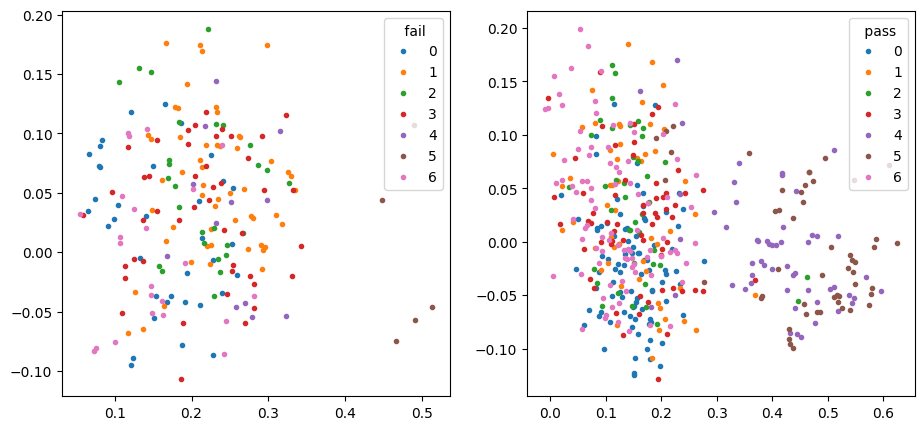

In [74]:
# Same data as plot above but slightly different
fig = plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)

i = 1
groups_pass = rslt_df_kmeans.groupby('pass/fail')
for passed, group_pass in groups_pass:
    groups = group_pass.groupby('kmean')
    plt.subplot(1, 2, i)
    for name, group in groups:
        plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
    plt.legend(title=passed)
    i = i + 1

# Supervised Learning

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)

y_encoded = le.transform(y)

# split into training and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42
)


In [76]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(
    SVC(gamma=2, C=1)
)

#clf = KNeighborsClassifier(3)

fit = clf.fit(X_train, y_train)

In [77]:
score = clf.score(X_test, y_test)
print("  --> result: " + str(score))

  --> result: 0.8604651162790697


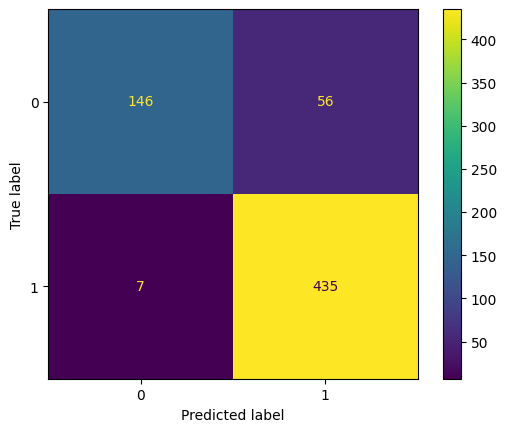

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X)
cm = confusion_matrix(y_encoded, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

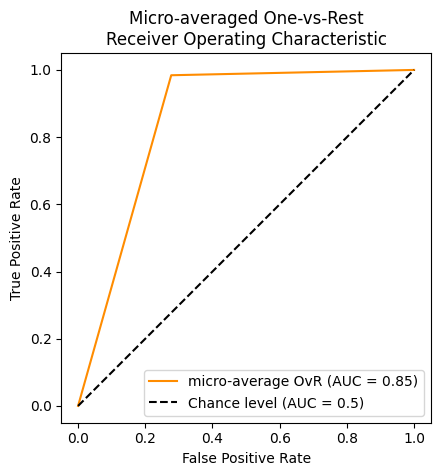

In [79]:
RocCurveDisplay.from_predictions(
    y_encoded.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

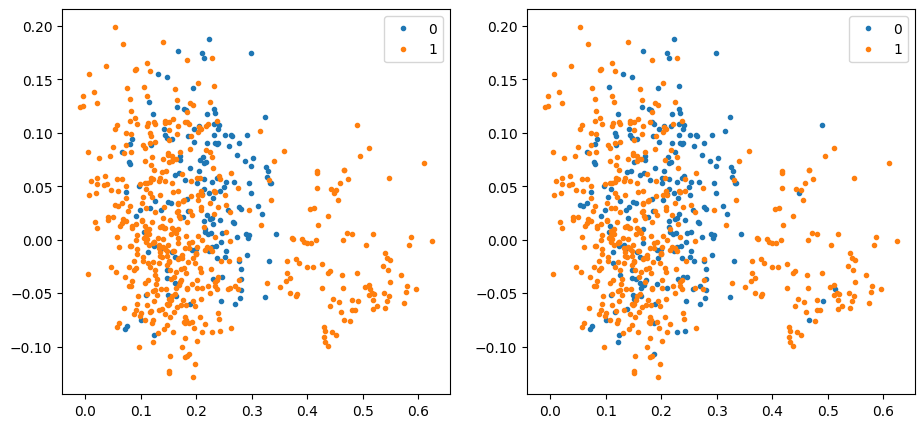

In [82]:
rslt_df_clf = rslt_df.copy()

rslt_df_clf["clf"] = y_pred
rslt_df_clf["pass/fail"] = y_encoded

fig = plt.figure(figsize=(11, 5))

# Kmeans grounp
plt.subplot(1, 2, 1)
groups = rslt_df_clf.groupby('clf')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

# Ground truth
plt.subplot(1, 2, 2)
groups = rslt_df_clf.groupby('pass/fail')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

Check if we can group the ones which weren't tested correctly

# PCA

In [17]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_)  

[2.41349612e-01 1.70726519e-01 6.78230400e-02 4.65529820e-02
 3.79376096e-02 3.14771801e-02 2.39217222e-02 1.47455354e-02
 1.01491354e-02 7.29221597e-03 5.08091925e-03 4.12944227e-03
 2.63951934e-03 2.36798953e-03 1.41771079e-03 8.86218743e-04
 6.77926970e-04 3.57139872e-04 2.84062595e-04 2.10582280e-04
 1.40290642e-04 1.16761874e-04 7.02190267e-05 5.28392374e-05
 3.91034941e-05 3.80427203e-05 2.41829374e-05 2.38309100e-05
 1.34060606e-05 9.66060271e-06 4.30197649e-06 2.92481737e-06
 8.48685985e-07 4.17946826e-13 1.86883080e-13 1.76448598e-13
 1.00737922e-13 8.96836774e-14 7.95010542e-14 6.47032695e-14
 5.78849565e-14 4.91819750e-14 4.51787304e-14 3.64002800e-14
 3.59263102e-14 3.45093106e-14 2.93830449e-14 2.85611002e-14
 2.59900985e-14 2.36619842e-14 2.24509862e-14 2.20173810e-14
 2.11441007e-14 2.06220823e-14 2.00846073e-14 1.73415050e-14
 1.64454493e-14 1.58249327e-14 1.45993925e-14 1.34609594e-14
 1.29629769e-14 1.26183893e-14 1.18187315e-14 1.15173667e-14
 1.13263062e-14 1.034251

In [25]:
pca.n_components = 3
X_reduced = pca.fit_transform(X)

dfx = pd.DataFrame(data=X_reduced)
dfx['pass/fail'] = rslt_df["pass/fail"].to_list()

dfx.head()

,0,1,2,pass/fail
0,0.529176,0.124373,-0.010649,pass
1,0.453789,0.093020,0.000830,pass
2,-0.464675,-0.479359,0.037879,pass
3,-0.672932,-0.258970,-0.482045,fail
4,0.508951,-0.169043,0.019057,pass


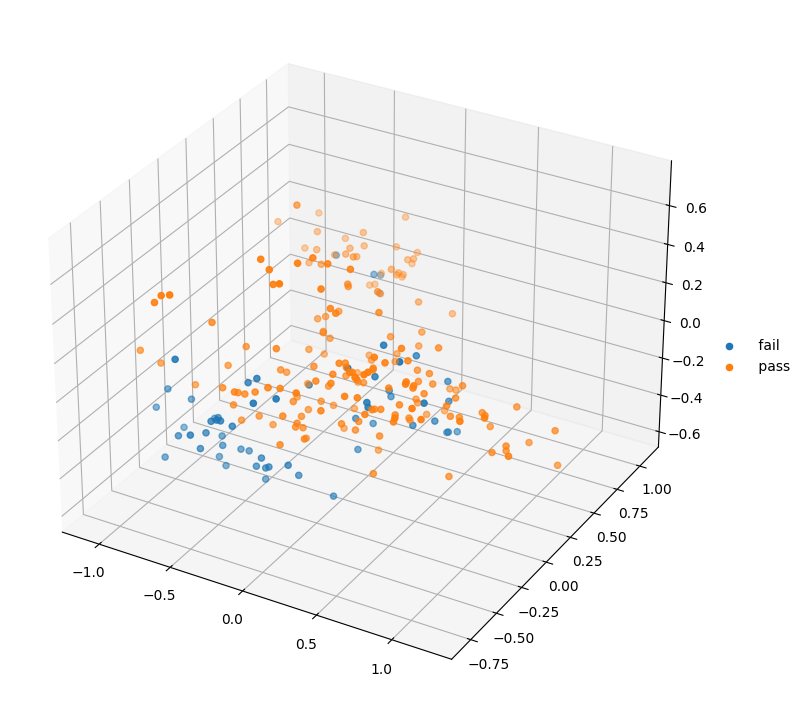

In [26]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='3d')

groups = dfx.groupby('pass/fail')
for name, group in groups:
    ax.scatter(group[0], group[1], group[2], label=name)

ax.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()

In [27]:
X_pca = dfx[list(range(0, pca.n_components))]
y_pca = dfx["pass/fail"]

k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X_pca)

print(k_means.labels_[::10])

[3 3 1 1 1 0 3 1 2 4 1 4 4 0 4 4 1 1 3 0 0 0 4 2 2]


/home/tbarber/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


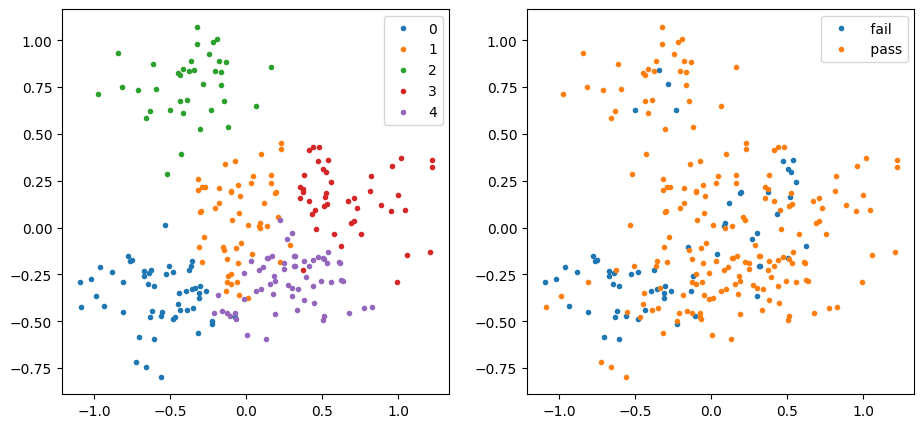

In [28]:
pca_rslt_df_kmeans = X_pca.copy()

pca_rslt_df_kmeans["kmean"] = k_means.labels_
pca_rslt_df_kmeans["pass/fail"] = y_pca

fig = plt.figure(figsize=(11, 5))

# Kmeans grounp
plt.subplot(1, 2, 1)
groups = pca_rslt_df_kmeans.groupby('kmean')
for name, group in groups:
    plt.plot(group[0], group[1], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

# Ground truth
plt.subplot(1, 2, 2)
groups = pca_rslt_df_kmeans.groupby('pass/fail')
for name, group in groups:
    plt.plot(group[0], group[1], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

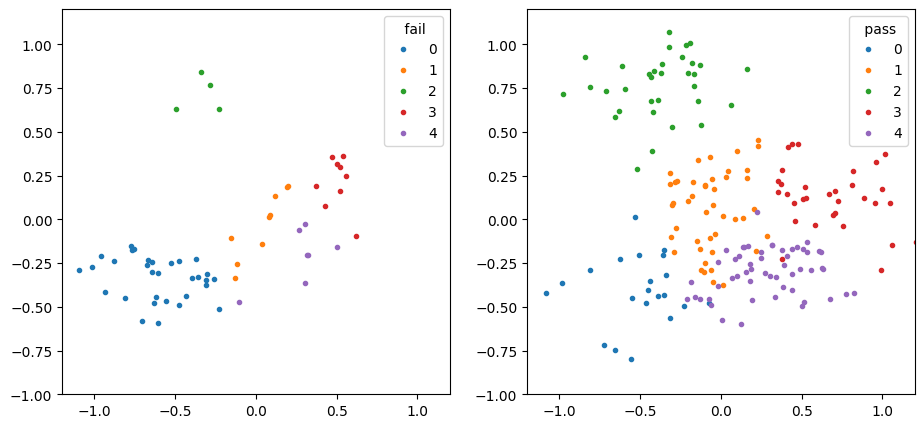

In [29]:
# Same data as plot above but slightly different
fig = plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)

i = 1
groups_pass = pca_rslt_df_kmeans.groupby('pass/fail')
for passed, group_pass in groups_pass:
    groups = group_pass.groupby('kmean')
    plt.subplot(1, 2, i)
    for name, group in groups:
        plt.plot(group[0], group[1], marker='o', linestyle='', markersize=3, label=name)
    plt.ylim(-1.0, 1.2)
    plt.xlim(-1.2, 1.2)
    plt.legend(title=passed)
    i = i + 1

kmean
0    31
3     9
1     9
4     7
2     4
Name: count, dtype: int64
kmean
4    54
1    44
3    34
2    33
0    21
Name: count, dtype: int64


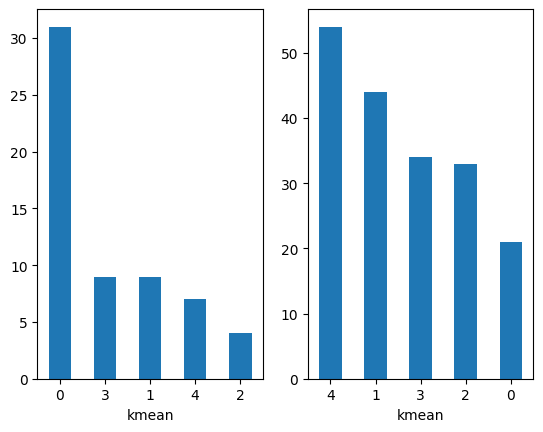

In [30]:
i = 1
groups_pass = pca_rslt_df_kmeans.groupby('pass/fail')
for passed, group_pass in groups_pass:
    plt.subplot(1, 2, i)
    vcs = group_pass["kmean"].value_counts(sort=True)
    vcs.sort_values()
    print(vcs)
    vcs.plot.bar(rot=0)
    i = i + 1